In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/mental-health-in-tech-survey/survey.csv')
print("DataFrame loaded")

DataFrame loaded


In [2]:
print(f'Shape : {df.shape}')
print(f'Info : {df.info()}')
print(f'Head : {df.head}')

Shape : (1259, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   o

In [3]:
print(df.describe())

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


In [4]:
print(f'Total missing values : {df.isnull().sum()}')

Total missing values : Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


This shows that "comments" and "state" missing values are more in number so they will hold very little value in our models.

In [5]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [6]:
features = df.columns
print(features)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [7]:
extra_features = ["Gender", "Country", "Timestamp", "Age", "state","comments"]
cat_features = [feature for feature in features if feature not in extra_features]
print(cat_features)

['self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


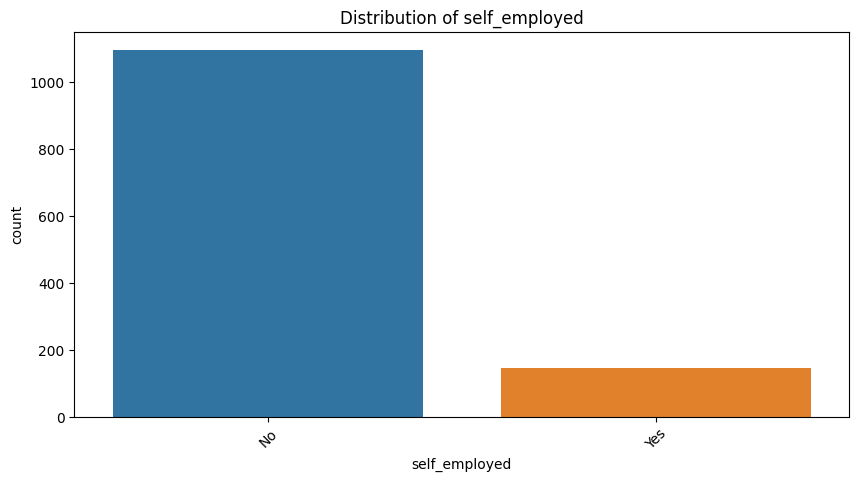

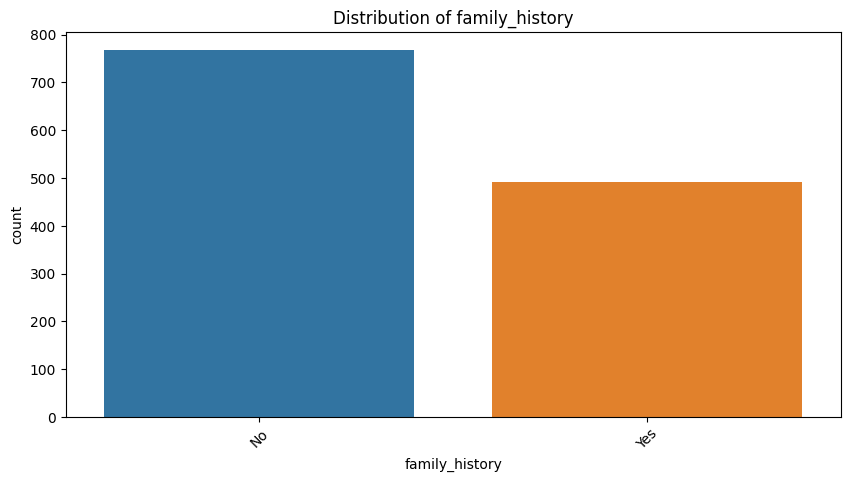

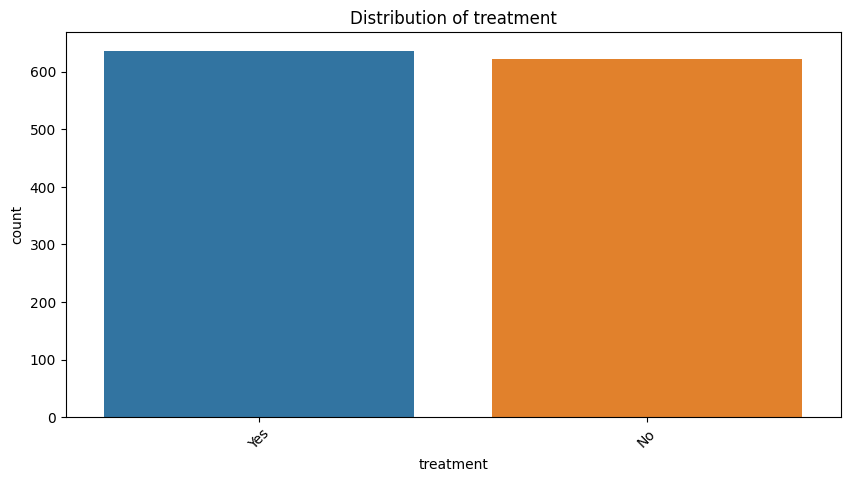

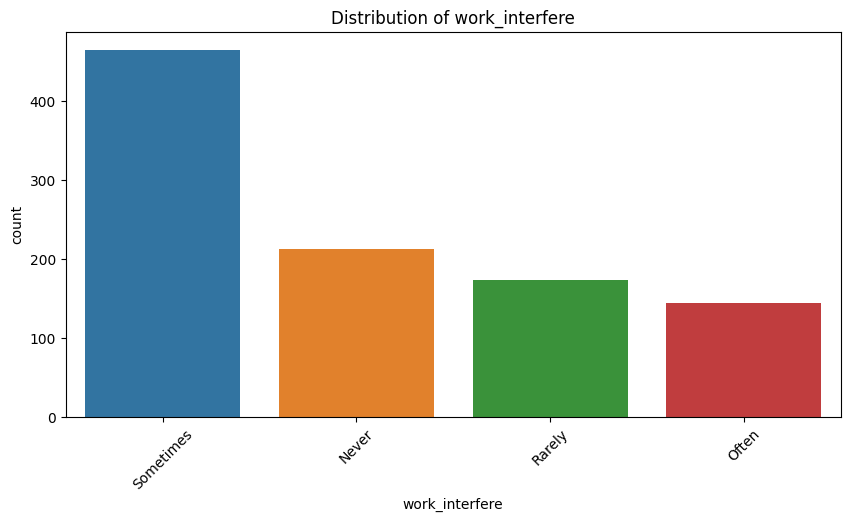

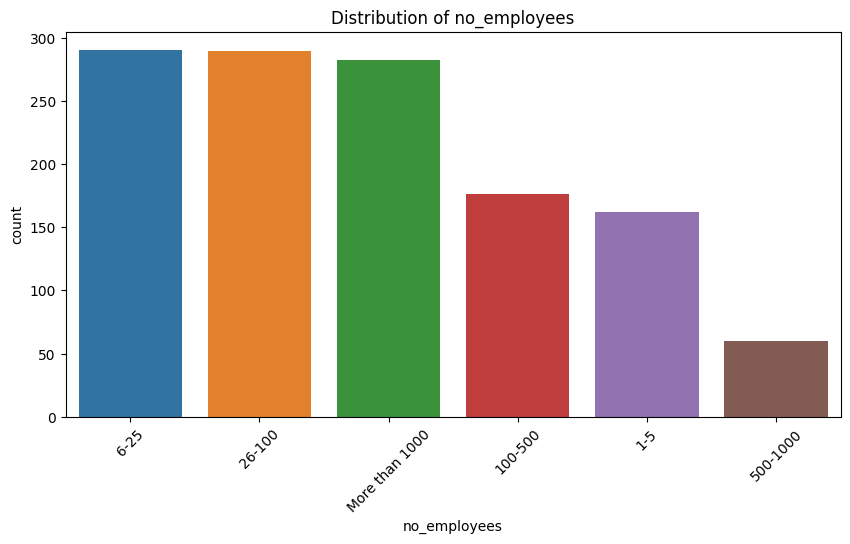

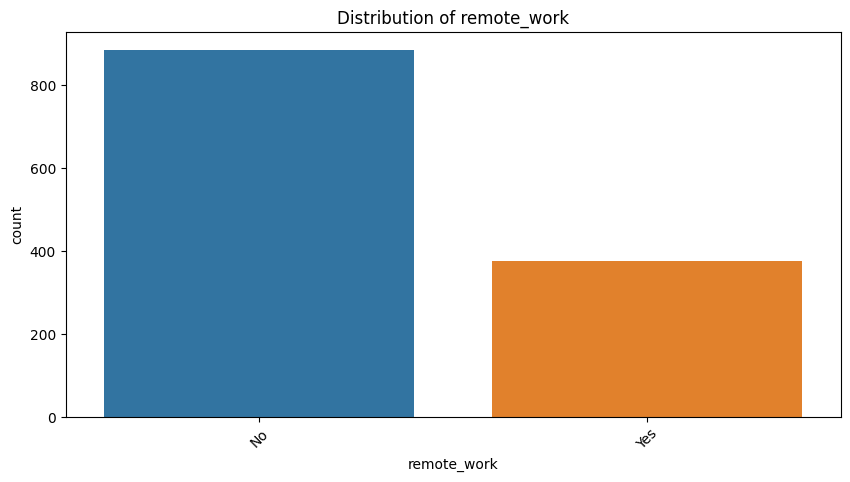

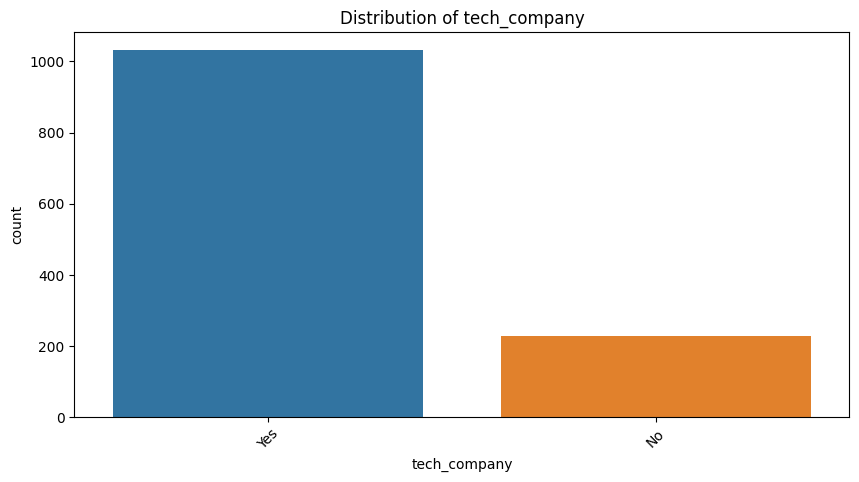

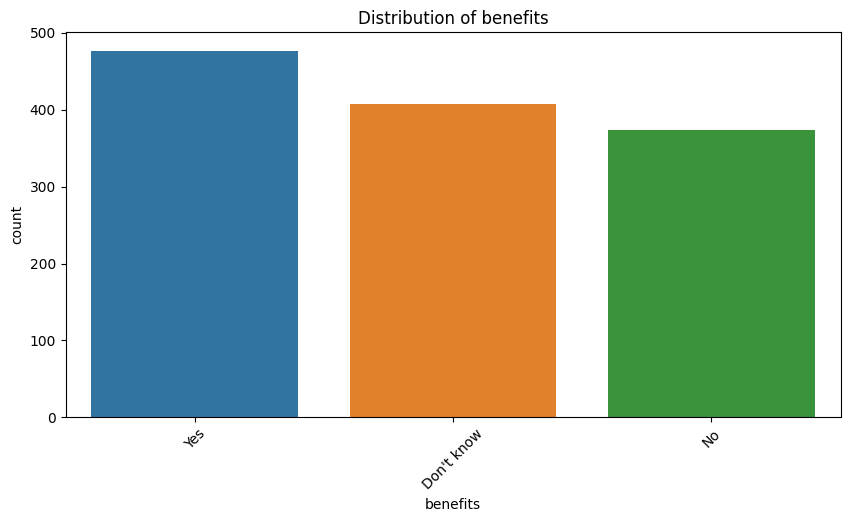

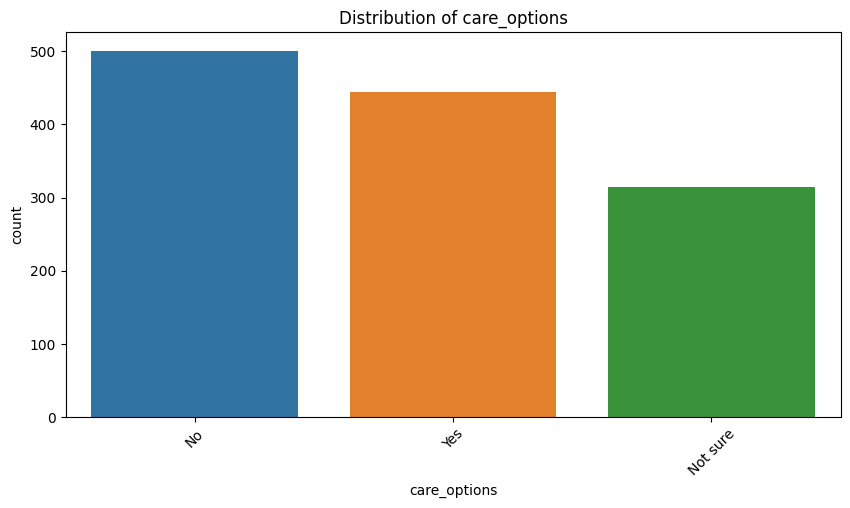

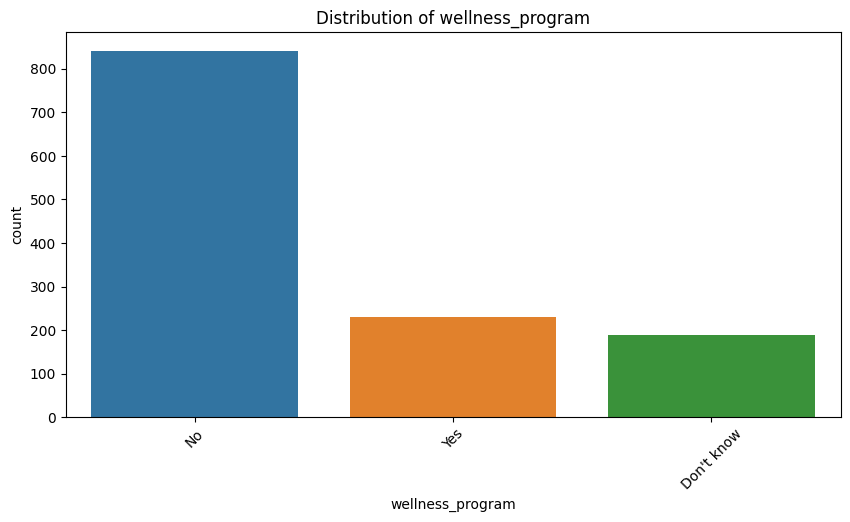

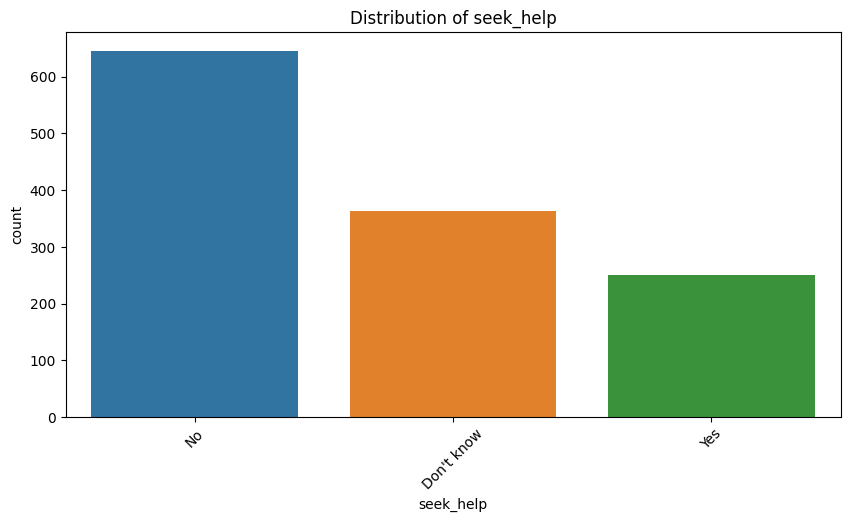

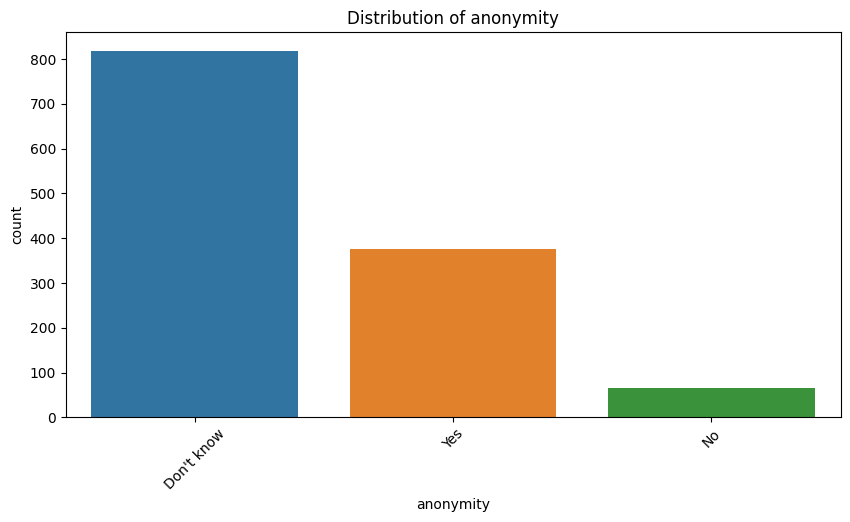

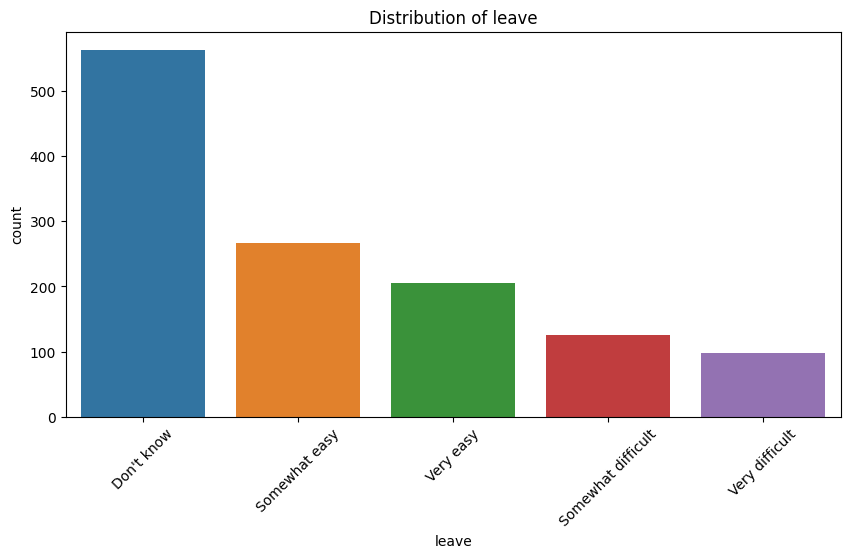

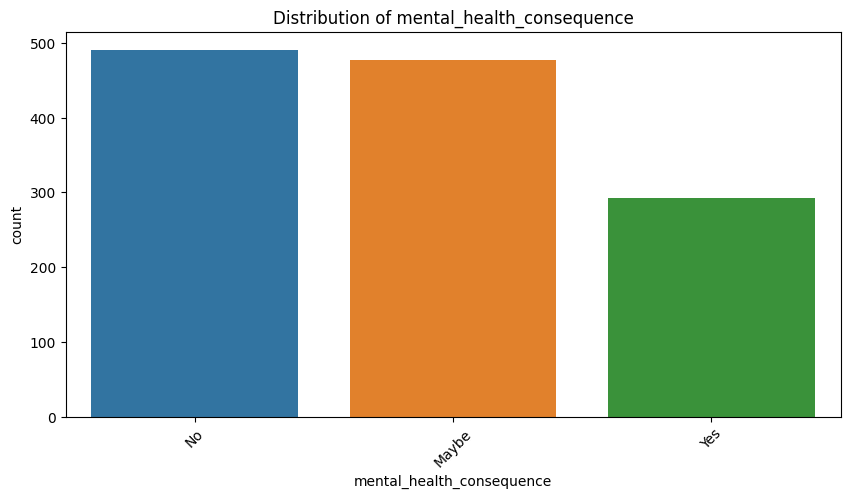

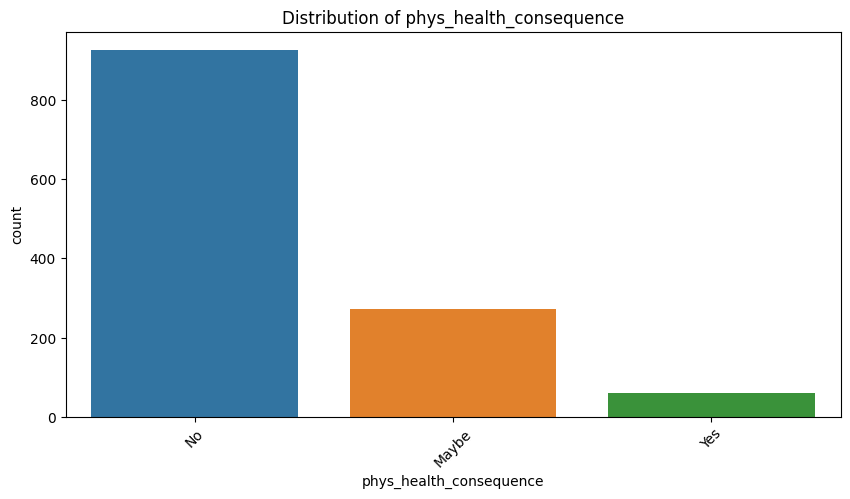

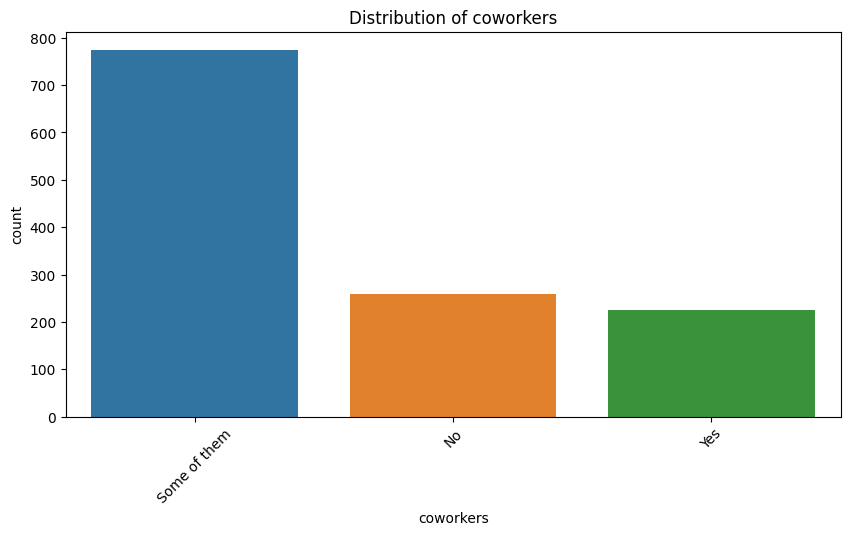

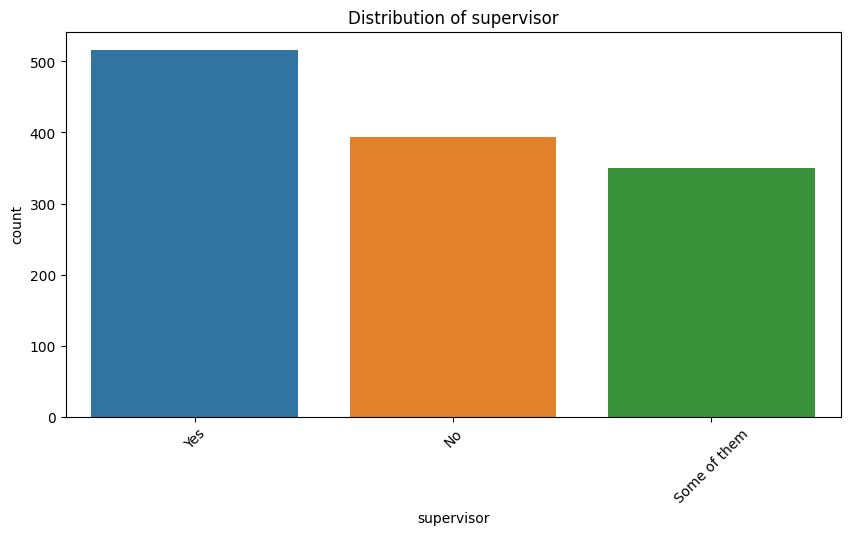

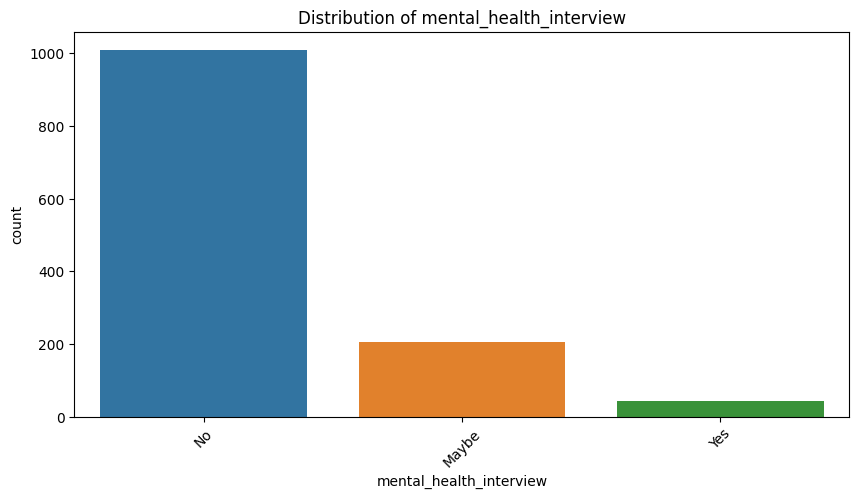

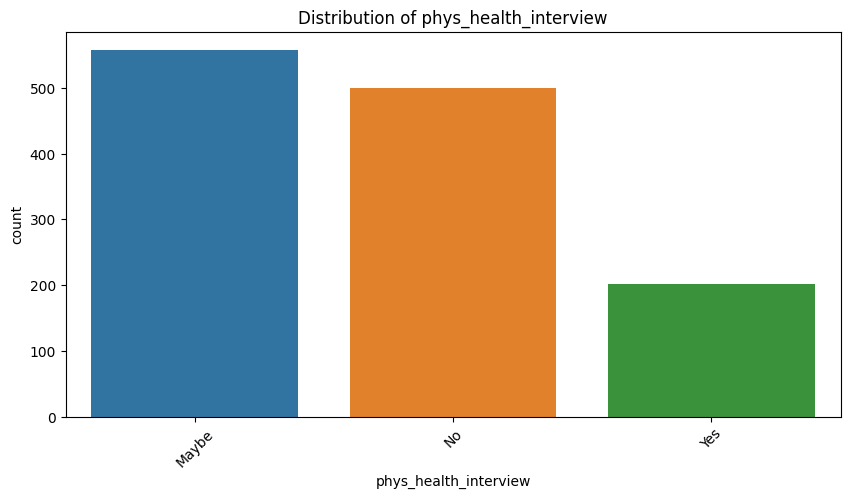

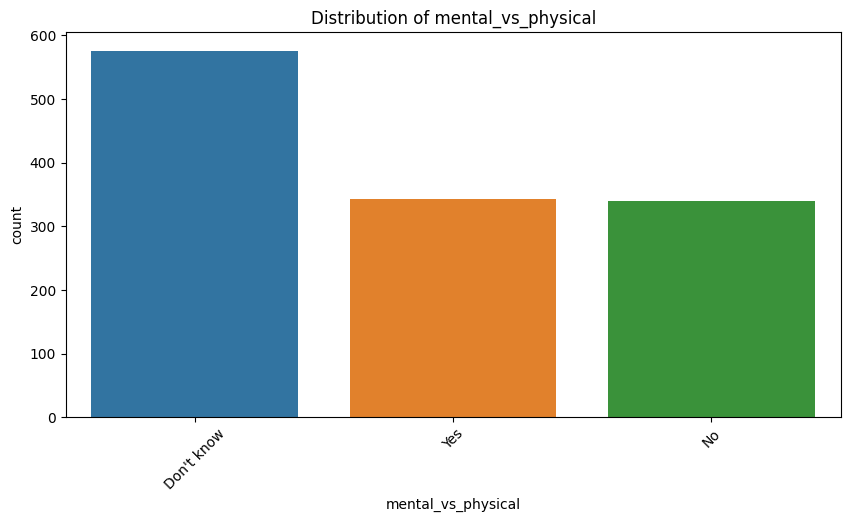

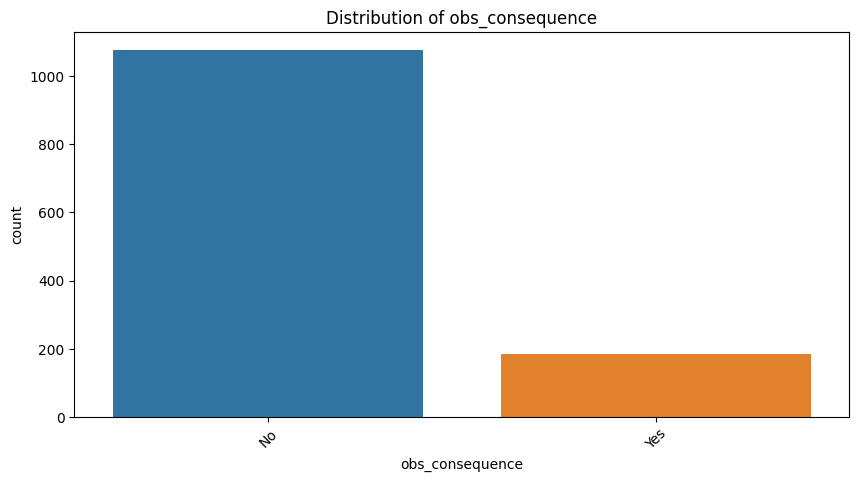

In [8]:
for feature in cat_features:
    plt.figure(figsize = (10,5))
    sns.countplot(x = feature, data = df, order = df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation = 45)
    plt.show()
    

In [9]:
for feature in extra_features:
    print(df[feature].value_counts())

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

This clearly tells us that some columns like **Age** and **Gender** need to be cleaned. The **Timestamp** column and **Comments** column will make the model inefficient so they need to be removed.


In [10]:
drop_columns = ["comments", "Timestamp"]
df.drop(columns = drop_columns, inplace = True)
print(f"shape : {df.shape}")

shape : (1259, 25)


In [11]:
# Clean Age outliers
df = df[(df['Age'] >= 18) & (df['Age'] <= 65)]
print(f'shape : {df.shape}')

shape : (1250, 25)


In [12]:
# Fix Gender column
# instead of keeping many entries we will classify them in 'male', 'female' and 'other/non-binary'

def clean_gender(gender):
    if not isinstance(gender, str): 
        return 'Other/Non-Binary'
    g = gender.lower()
    if 'fem' in g or 'wom' in g or g == 'f':
        return 'Female'
    elif 'mal' in g or 'man' in g or g == 'm' or 'guy' in g:
        return 'Male'
    else :
        return 'Other/Non-Binary'
df['Gender'] = df['Gender'].apply(clean_gender)
print(df['Gender'].value_counts())

Gender
Male                983
Female              250
Other/Non-Binary     17
Name: count, dtype: int64


In [13]:
extra_features = [feature for feature in extra_features if feature not in ['comments','Timestamp']]
for feature in extra_features:
    print(df[feature].value_counts())

Gender
Male                983
Female              250
Other/Non-Binary     17
Name: count, dtype: int64
Country
United States             745
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Italy                       7
Poland                      7
Sweden                      7
Switzerland                 7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Russia                      3
Finland                     3
Austria                     3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Moldova          

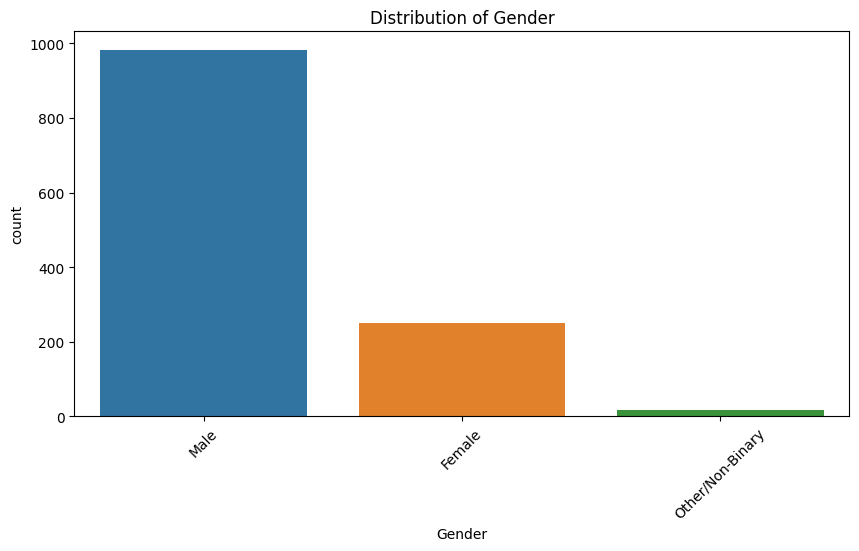

In [14]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Gender', data = df, order = df['Gender'].value_counts().index)
plt.title(f'Distribution of Gender')
plt.xticks(rotation = 45)
plt.show()
    

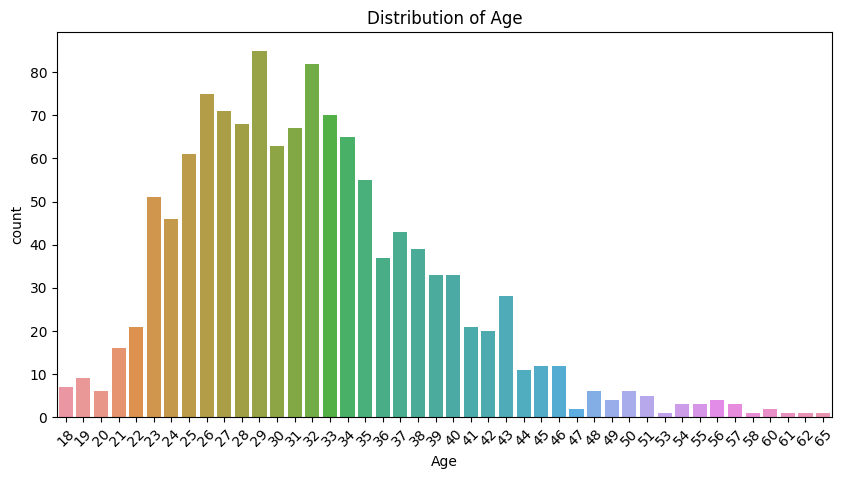

In [15]:
plt.figure(figsize = (10,5))
age_order = sorted(df['Age'].unique())
sns.countplot(x = 'Age', data = df, order = age_order)
plt.title(f'Distribution of Age')
plt.xticks(rotation = 45)
plt.show()
    

So far, we have dropped columns - 'Timestamp' and 'comments'. cleaned columns like 'Age' and 'Gender'. 
From the univariate analysis it can be seen that most of the respondants in out dataset are between the age group of 20 to 46. The number of males is significantly higher than the other two categories which suggest that mental wellness is a problem common amongst males.

In [16]:
# Final columns
print(df.columns)

Index(['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')


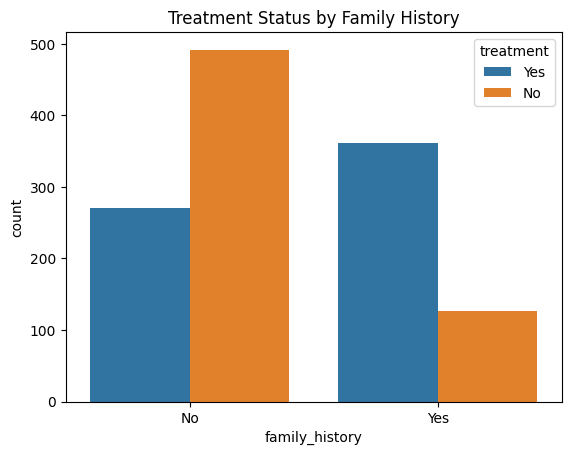

In [17]:
sns.countplot(x='family_history', hue='treatment', data=df)
plt.title('Treatment Status by Family History')
plt.show()

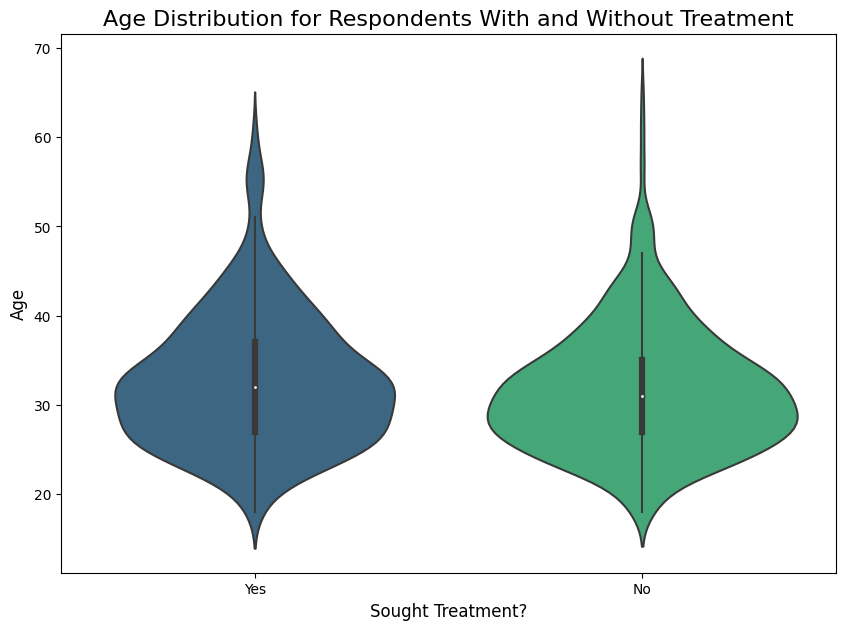

In [18]:
plt.figure(figsize=(10, 7))
sns.violinplot(
    x='treatment',
    y='Age',
    data=df,
    palette='viridis'
)
plt.title('Age Distribution for Respondents With and Without Treatment', fontsize=16)
plt.xlabel('Sought Treatment?', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

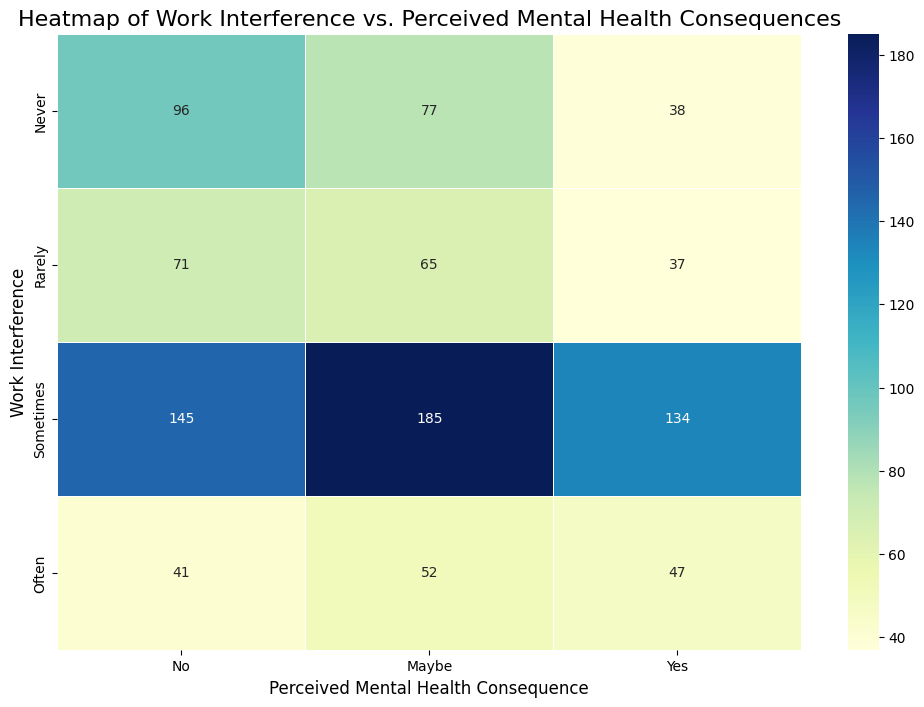

In [19]:
contingency_table = pd.crosstab(df['work_interfere'], df['mental_health_consequence'])

# Reorder the columns and rows for a more logical flow
ordered_rows = ['Never', 'Rarely', 'Sometimes', 'Often']
ordered_cols = ['No', 'Maybe', 'Yes']
contingency_table = contingency_table.reindex(ordered_rows).reindex(ordered_cols, axis=1)


plt.figure(figsize=(12, 8))
sns.heatmap(
    contingency_table,
    annot=True,      
    fmt='d',         
    cmap='YlGnBu',   
    linewidths=.5
)
plt.title('Heatmap of Work Interference vs. Perceived Mental Health Consequences', fontsize=16)
plt.xlabel('Perceived Mental Health Consequence', fontsize=12)
plt.ylabel('Work Interference', fontsize=12)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


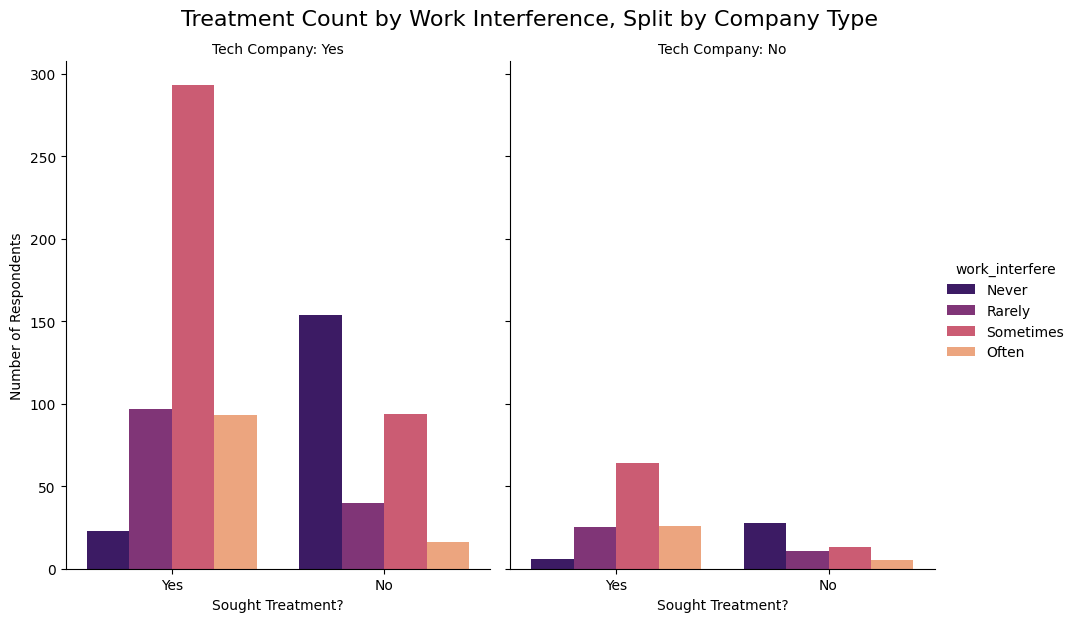

In [20]:
g = sns.catplot(
    x='treatment',
    col='tech_company', # Creates separate columns for 'Yes' and 'No' in tech_company
    hue='work_interfere',
    hue_order=ordered_rows, # Use the logical order we defined earlier
    data=df,
    kind='count', # Creates a count plot
    height=6,
    aspect=0.8,
    palette='magma'
)
g.fig.suptitle('Treatment Count by Work Interference, Split by Company Type', y=1.03, fontsize=16)
g.set_axis_labels('Sought Treatment?', 'Number of Respondents')
g.set_titles("Tech Company: {col_name}")
plt.show()

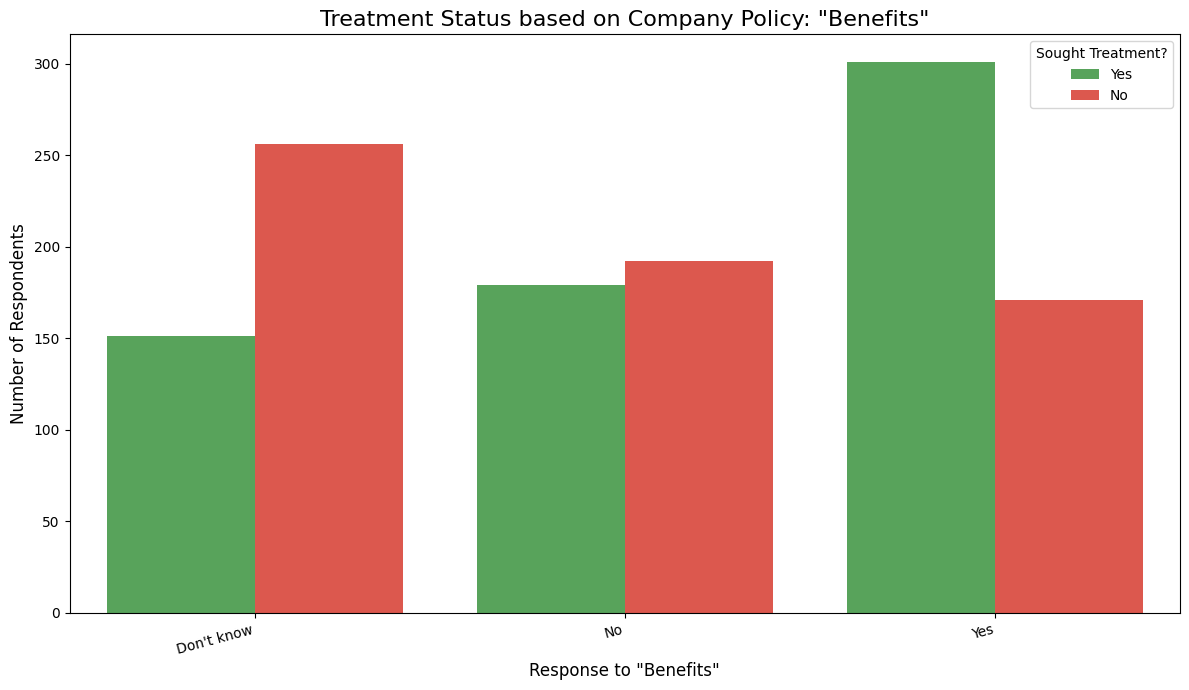

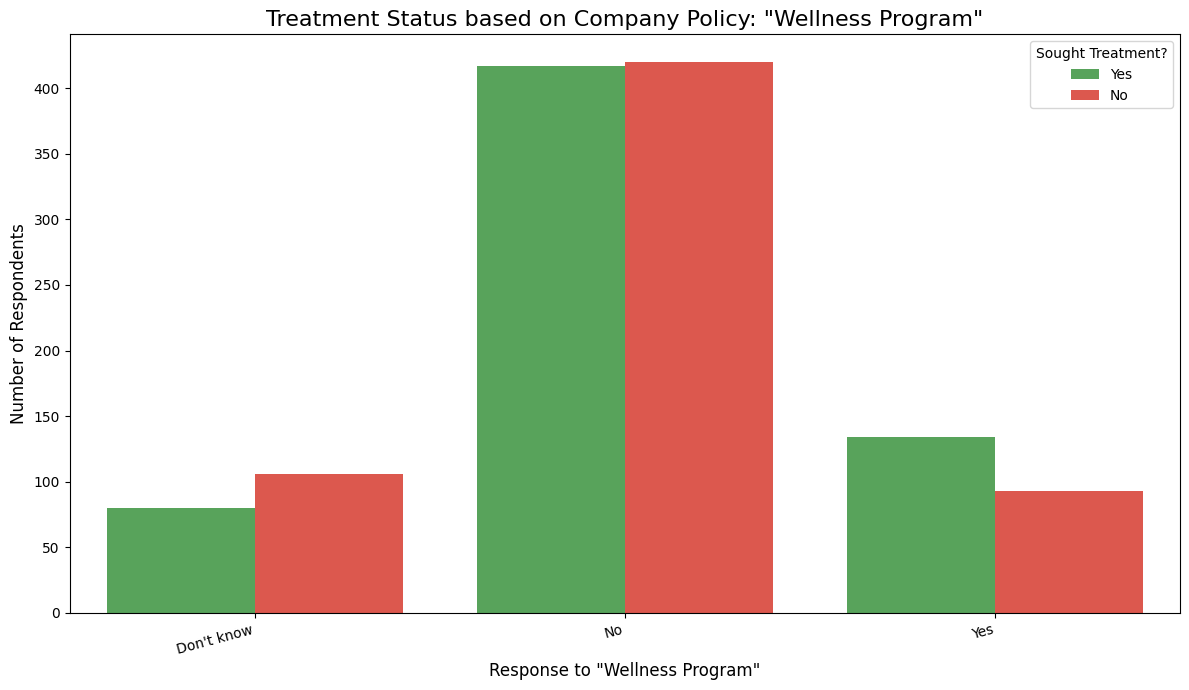

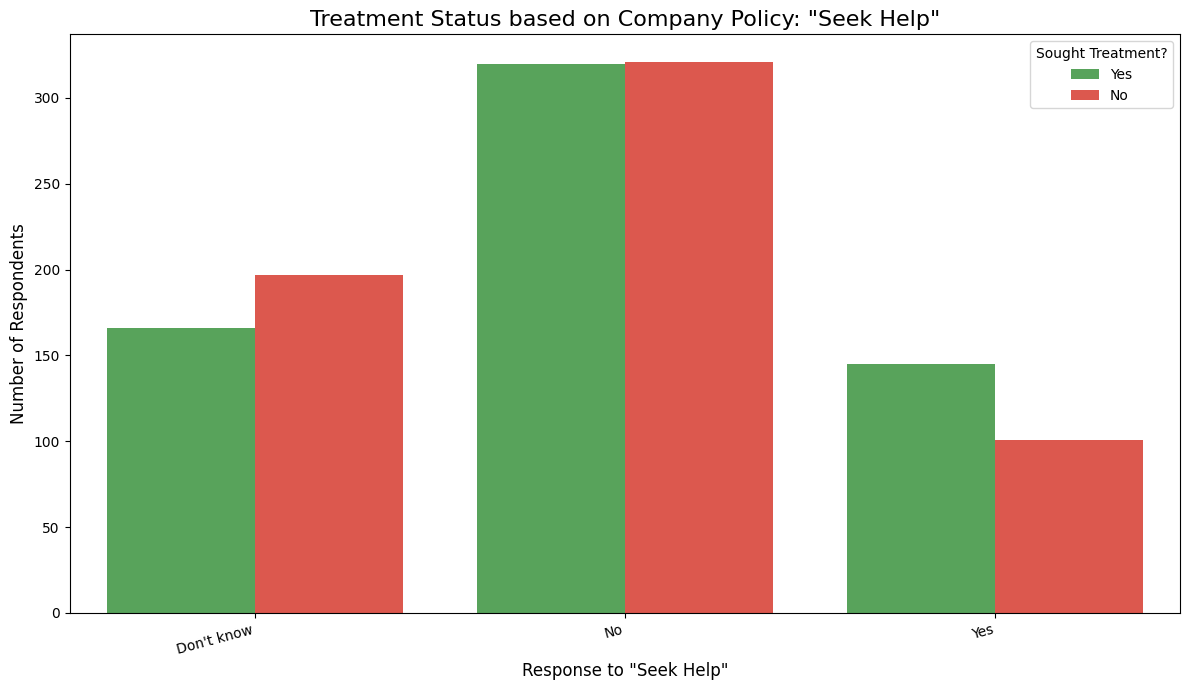

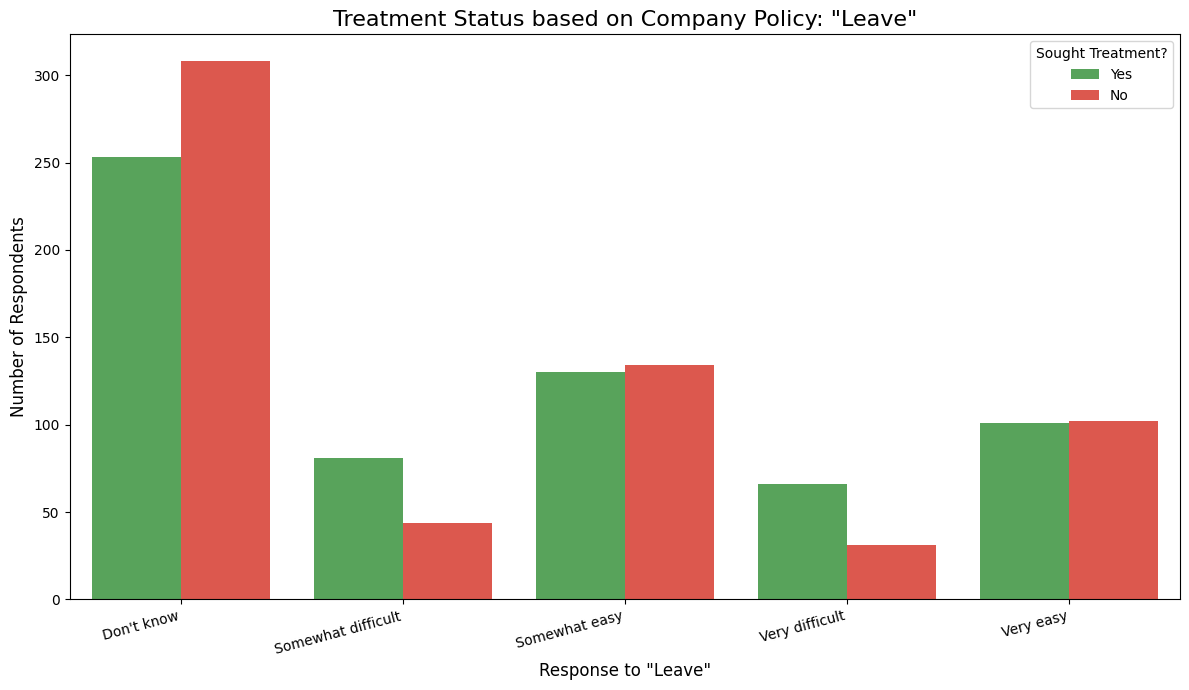

In [21]:
policy_columns = [
    'benefits',
    'wellness_program',
    'seek_help',
    'leave'
]
treatment_palette = {'Yes': '#4CAF50', 'No': '#F44336'}

for col in policy_columns:
    plt.figure(figsize=(12, 7))
    sns.countplot(
        x=col,
        hue='treatment', # This is the key part: it splits the bars based on the 'treatment' column
        data=df,
        palette=treatment_palette,
        order=sorted(df[col].unique()) # Sort the x-axis categories for consistency
    )
    plt.title(f'Treatment Status based on Company Policy: "{col.replace("_", " ").title()}"', fontsize=16)
    plt.ylabel('Number of Respondents', fontsize=12)
    plt.xlabel(f'Response to "{col.replace("_", " ").title()}"', fontsize=12)
    plt.xticks(rotation=15, ha='right') # Rotate labels slightly for readability
    plt.legend(title='Sought Treatment?')
    plt.tight_layout()
    plt.show()

In [22]:
# Let us now encode our features to better suit them for modelling and seeing the corrleation between them
from sklearn.preprocessing import LabelEncoder
leave_map = {'Very easy': 4, 'Somewhat easy': 3, "Don't know": 2, 'Somewhat difficult': 1, 'Very difficult': 0}
df['leave'] = df['leave'].map(leave_map)

work_interfere_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3}
df['work_interfere'] = df['work_interfere'].map(work_interfere_map)

no_employees_map = {'1-5': 0, '6-25': 1, '26-100': 2, '100-500': 3, '500-1000': 4, 'More than 1000': 5}
df['no_employees'] = df['no_employees'].map(no_employees_map)

trinary_map = {'No': 0, 'Maybe': 1, "Don't know": 1, 'Not sure': 1, 'Some of them': 1, 'Yes': 2}
trinary_cols = [
    'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity',
    'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor',
    'mental_health_interview', 'phys_health_interview', 'mental_vs_physical'
]
for col in trinary_cols:
    df[col] = df[col].map(trinary_map)

binary_map = {'No': 0, 'Yes': 1}
binary_cols = [
    'self_employed', 'family_history', 'treatment', 'remote_work', 
    'tech_company', 'obs_consequence'
]
for col in binary_cols:
    df[col] = df[col].map(binary_map)

for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])



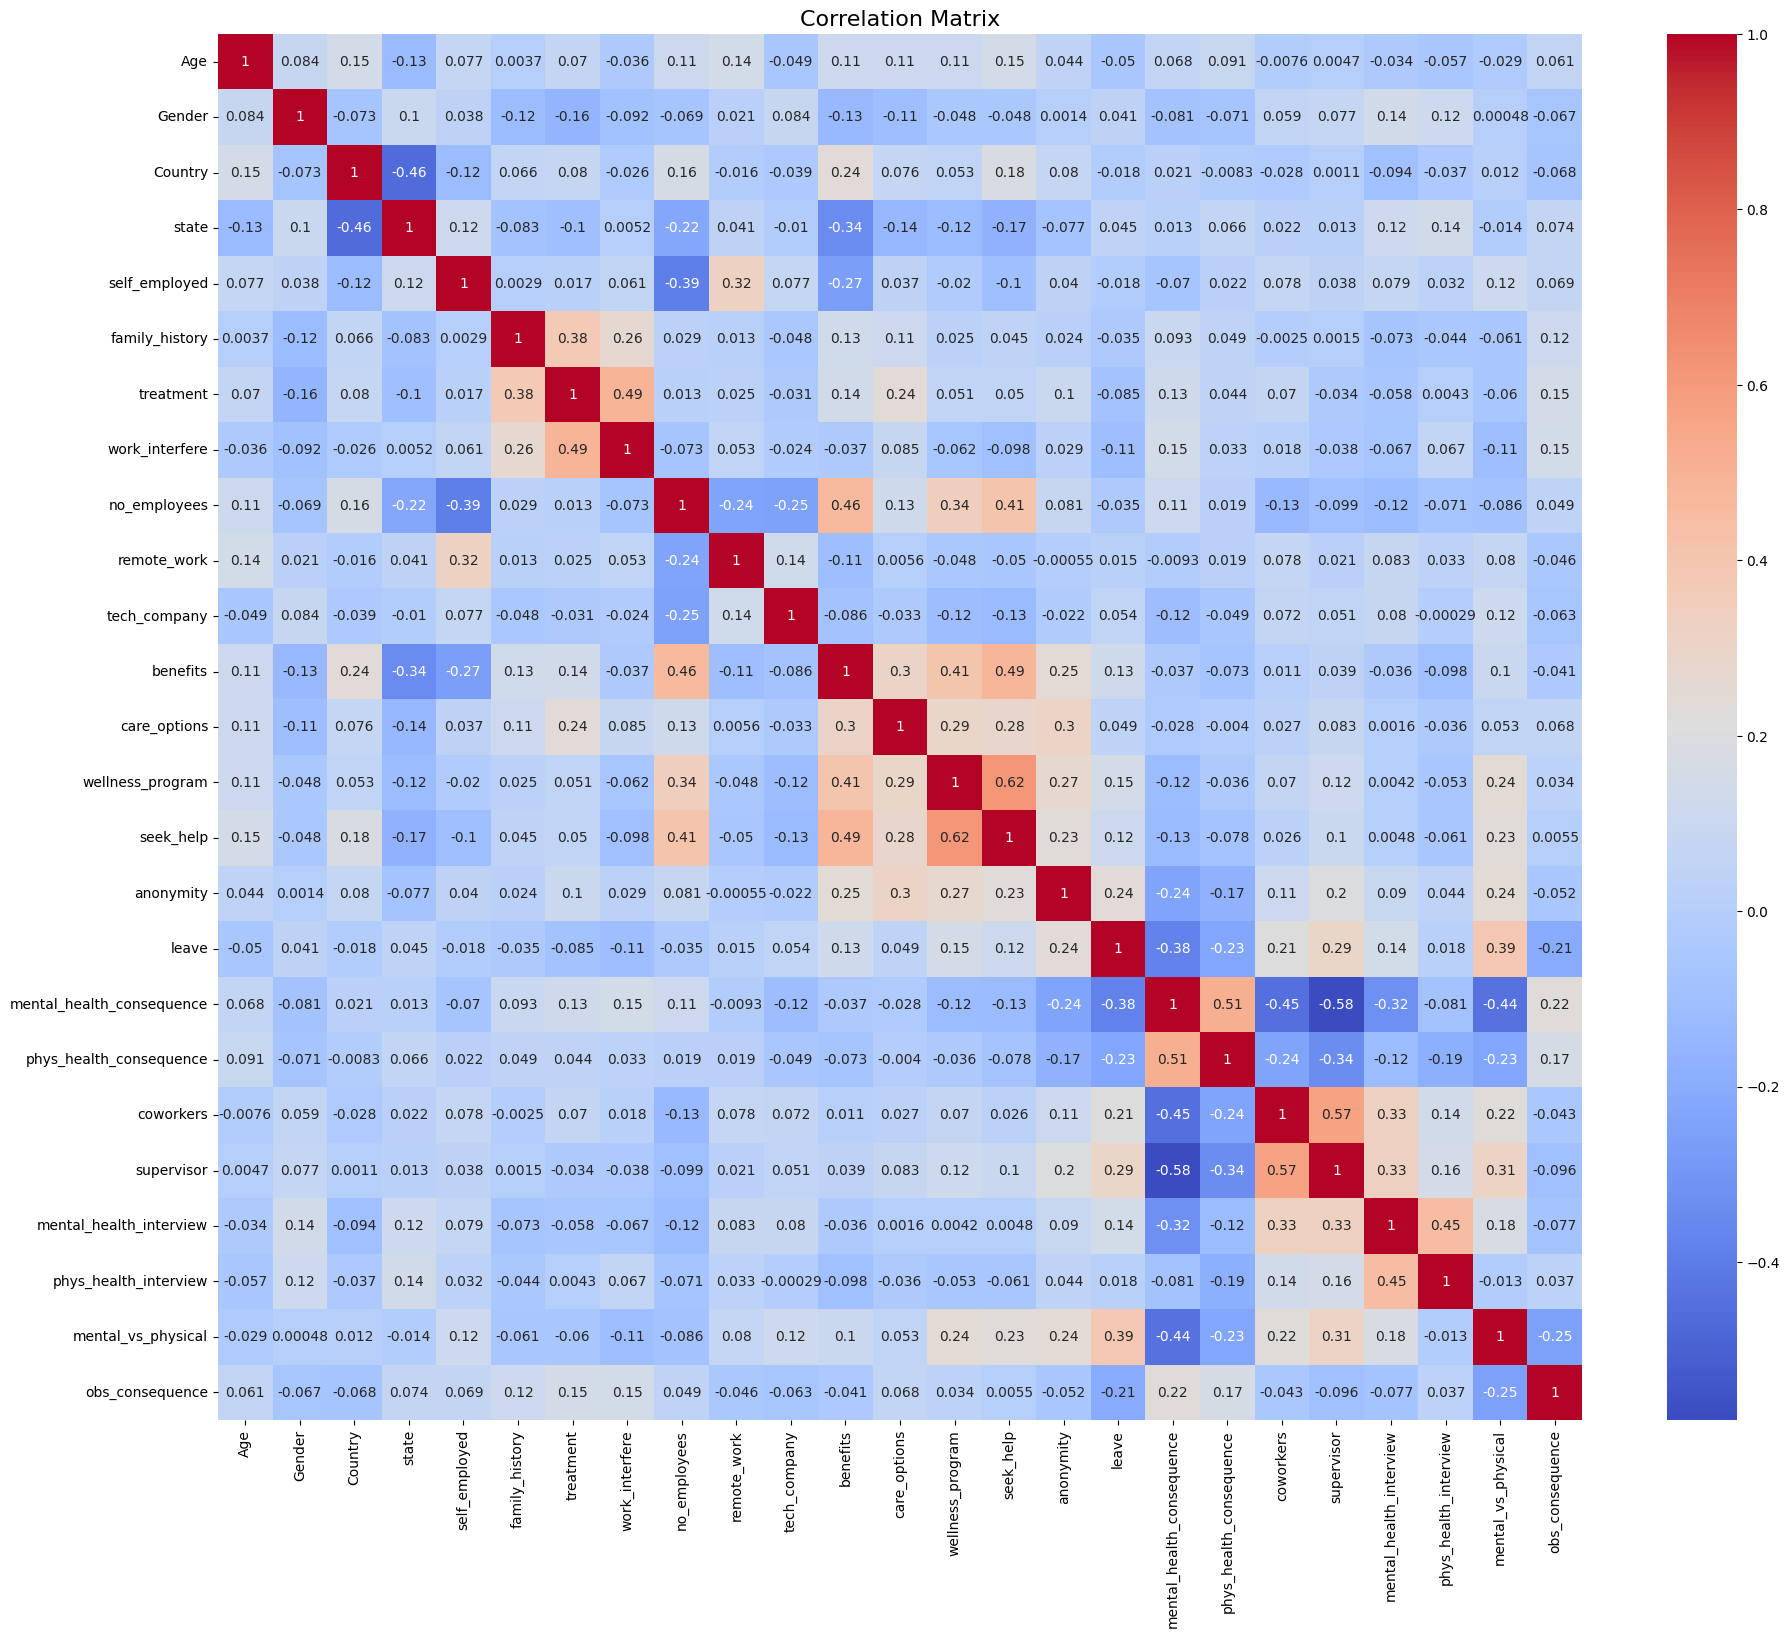

In [23]:
correlation_matrix = df.corr()
plt.figure(figsize = (22,18))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()